## Задание

Найдите любую базу с текстами разных классов и напишите их распознавание, используя рекуррентные или сверточные слои. Для этого выполните следующее:

- Спарсите тексты, превратите их в индексы.
- Разделите данные на обучающую и проверочную выборки.
- Напишите сеть для распознавания текстов.
- Сделайте визуализацию результата.
- Напишите ваши результаты и выводы.



In [1]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.python.keras.optimizers import Adam, RMSprop
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
import os
import re
import requests
from bs4 import BeautifulSoup
from random import randint

className = ["Егор Летов", "Вероника Тушнова"]
nClasses = len(className)

trainText = []
testText = []

# here className[0]
letov = ''
list_links = []
r = requests.get('http://www.gr-oborona.ru/texts/')
soup = BeautifulSoup(r.text, 'lxml')
div = soup.find_all('a')
# we make list all links songs
for a in div:
    link = a.get('href')
    if link[:6] == '/texts':
        list_links.append('http://www.gr-oborona.ru' + link)
# we make list all links songs
for link in list_links:
    r = requests.get(link)
    soup = BeautifulSoup(r.text, 'lxml')
    # we add song's name in our dict
    div = str(soup.find('h3'))
    name = div[4:]
    name = name[:-5]
    # we add song's name in our dict
    # we formatting song's text
    find_text = soup.find('div', {'id': 'cont'})
    rega = re.compile(r'Альбом:(.*?)<strong>')
    find_text = rega.findall(str(find_text))
    rega2 = re.compile(r'</p>(.*?)<p>')
    find_text = rega2.findall(str(find_text))
    find_text = str(find_text)
    find_text = find_text.replace('["', '').replace('\\xa0', ' ').replace('\\', '').replace('<br/>', '\n').replace('"]', '')
    # we formatting song's text
    letov += find_text + '\n\n\n'

# here className[1]
veronika = ''
for n in range(13564,13687):
    r = requests.get(f'http://ruspoeti.ru/aut/tushnova/{n}/')
    soup = BeautifulSoup(r.text, 'lxml')
    soup = str(soup)
    start = soup.find('class="pcont"')
    finish = soup.find('class="pfoot"')
    soup = soup[start:finish]
    st = 'Тушнова</em><br/><br/>'
    start = soup.find('Тушнова</em><br/><br/>')
    finish = soup.find('</p><div') 
    soup = soup[start+len(st):finish]
    soup = soup.replace('<br/>', '')
    veronika += soup + '\n\n\n'

trainText.append(letov)
trainText.append(veronika)

tokenizer = Tokenizer(num_words=20000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)

trainWordIndexes = tokenizer.texts_to_sequences(trainText)

In [0]:
s0 = len(trainWordIndexes[0])//10*8
s1 = len(trainWordIndexes[1])//10*8
assert(s0 % 1 == 0)
assert(s1 % 1 == 0)

In [0]:
testWordIndexes = []
testWordIndexes.append(trainWordIndexes[0][s0:])
testWordIndexes.append(trainWordIndexes[1][s1:])
trainWordIndexes[0] = trainWordIndexes[0][:s0]
trainWordIndexes[1] = trainWordIndexes[1][:s1]

In [0]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
  return xSample

def createSetsMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) 
  xSamples = []
  ySamples = []
  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))
  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)
  return (xSamples, ySamples)

In [0]:
xLen = 25
step = 5

In [0]:
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)

Epoch 1/90
100/100 [==============================] - 1s 8ms/step - loss: 0.3017 - accuracy: 0.8626 - val_loss: 0.5666 - val_accuracy: 0.9611
Epoch 2/90
100/100 [==============================] - 1s 7ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.4575 - val_accuracy: 0.9789
Epoch 3/90
100/100 [==============================] - 1s 6ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3290 - val_accuracy: 0.9870
Epoch 4/90
100/100 [==============================] - 1s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.2012 - val_accuracy: 0.9903
Epoch 5/90
100/100 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1089 - val_accuracy: 0.9911
Epoch 6/90
100/100 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9903
Epoch 7/90
100/100 [==============================] - 1s 7ms/step - loss: 8.9868e-04 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9911
Ep

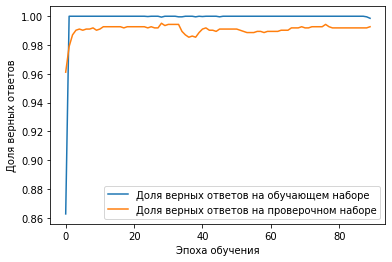

In [40]:
model = Sequential()
model.add(Embedding(20000, 12, input_length=xLen))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=90,
                    batch_size=50,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Ну мы заведомо выбрали уж очень разных поэтов) Не удивительно, что результат такой. Зато хорошо научились парсить и форматировать тексты с использовнаием регулярных выражений.